In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

Malignant, Tumor:


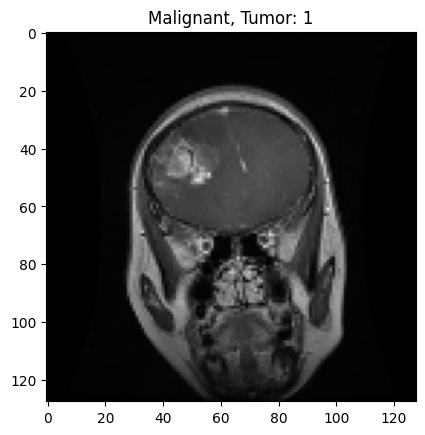

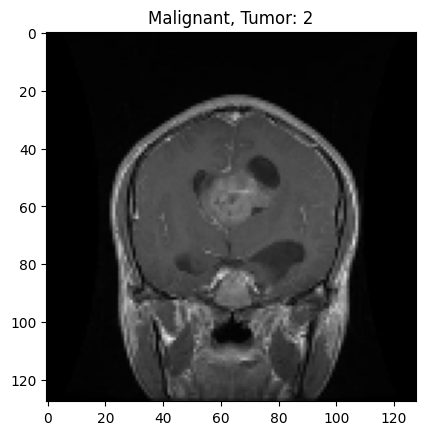

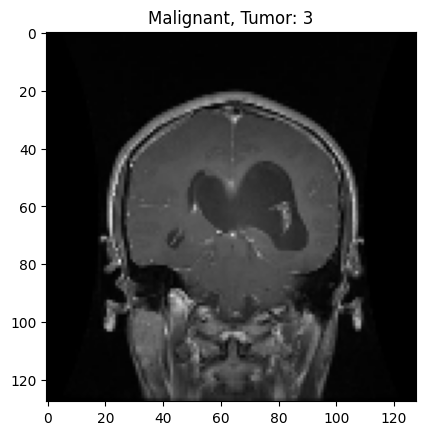

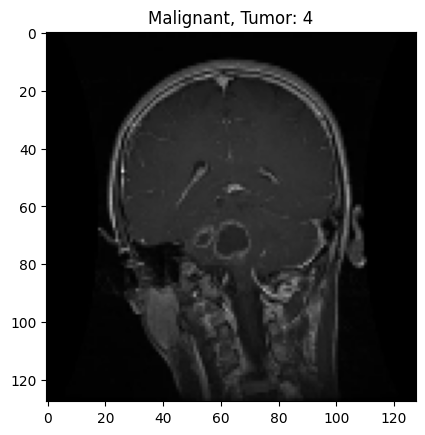

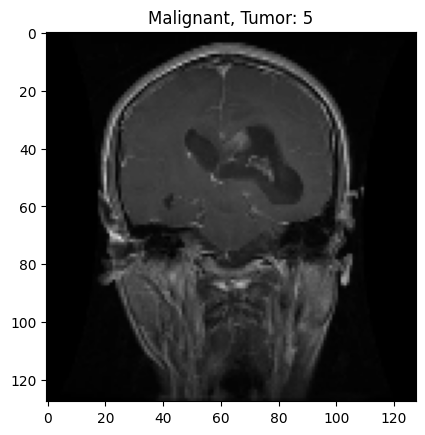

In [2]:

print("Malignant, Tumor:")
glioma_folder ="Training/glioma"
x=0

for img_name in os.listdir(glioma_folder):
    img_path = os.path.join(glioma_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Malignant, Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

No tumor:


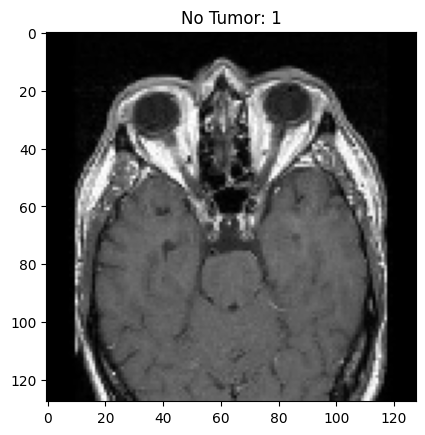

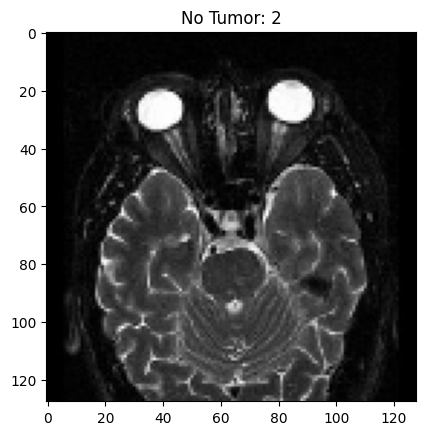

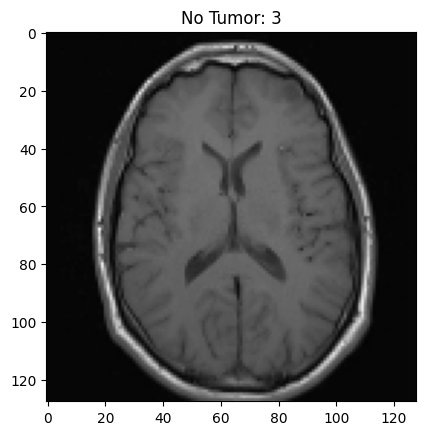

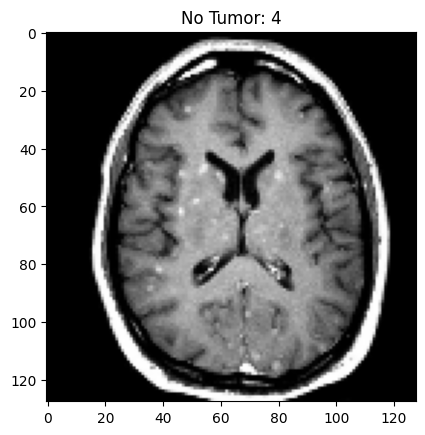

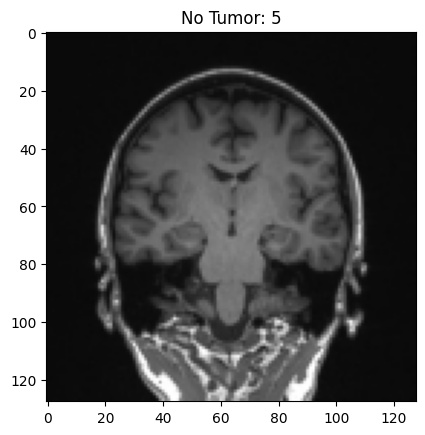

In [3]:
print("No tumor:")
notumor_folder="Training/notumor"
x=0

for img_name in os.listdir(notumor_folder):
    img_path = os.path.join(notumor_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("No Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

Beningn:


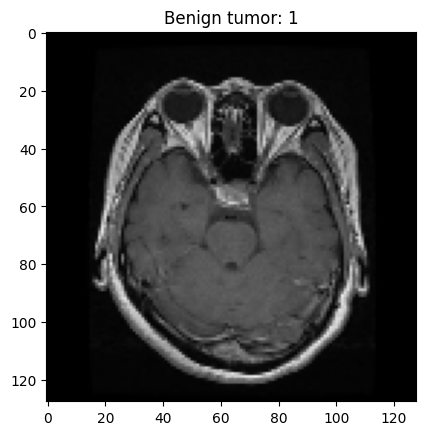

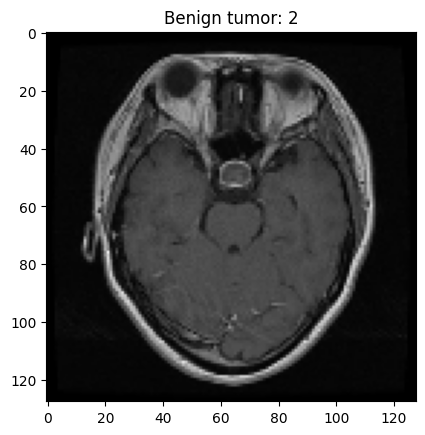

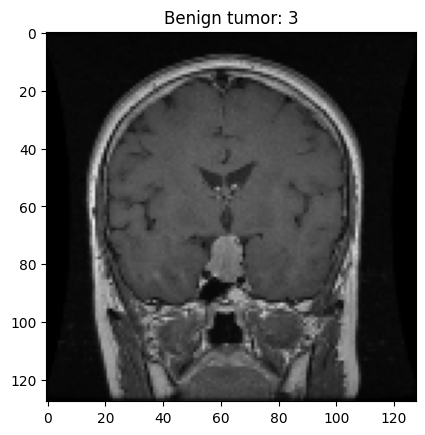

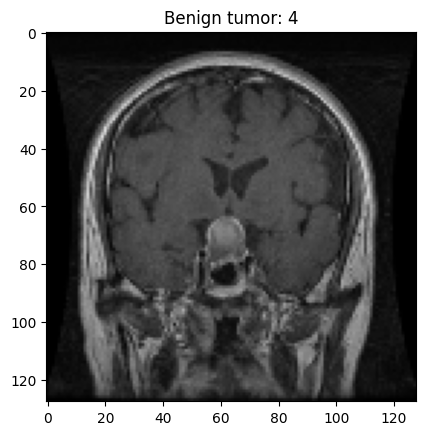

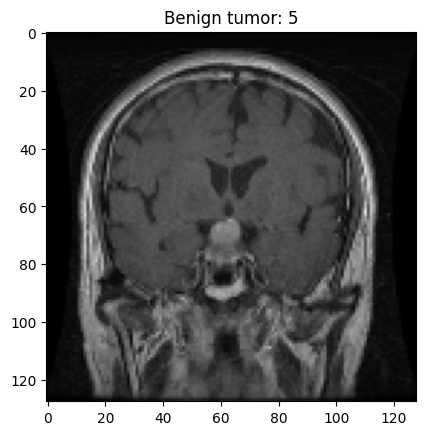

In [4]:
print("Beningn:")
benign_folder="Training/pituitary"
x=0

for img_name in os.listdir(benign_folder):
    img_path = os.path.join(benign_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title("Benign tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

In [5]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}


categories = {
    "Tumor": ["Glioma", "Pituitary", "Meningioma"],
    "No Tumor": ["No Tumor"],
    "Benign": ["Pituitary"],
    "Malignant": ["Glioma", "Meningioma"]
}


category_counts = {cat: 0 for cat in categories}

for category, included_folders in categories.items():
    for folder in included_folders:
        folder_path = original_folders[folder]
        category_counts[category] += len(os.listdir(folder_path))

print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")


image_formats = Counter()
image_sizes = Counter()

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = cv2.imread(img_path)

        if img is None:
            continue

        image_formats[img_name.split('.')[-1].lower()] += 1
        image_sizes[img.shape[:2]] += 1

print("\nImage formats:")
for fmt, count in image_formats.items():
    print(f"{fmt}: {count}")

print("\nImage sizes:")
for size, count in image_sizes.items():
    print(f"{size}: {count} images")

print("\nPotential Class Imbalance:")
max_class = max(category_counts, key=category_counts.get)
min_class = min(category_counts, key=category_counts.get)
print(f"Most images: {max_class} ({category_counts[max_class]} images)")
print(f"Fewest images: {min_class} ({category_counts[min_class]} images)")
imbalance_ratio = category_counts[max_class] / category_counts[min_class]
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")


Number of images in each category:
Tumor: 4117
No Tumor: 1595
Benign: 1457
Malignant: 2660

Image formats:
jpg: 5712

Image sizes:
(512, 512): 3955 images
(350, 350): 11 images
(613, 605): 2 images
(592, 562): 2 images
(442, 442): 37 images
(630, 630): 77 images
(442, 400): 16 images
(212, 220): 2 images
(225, 225): 268 images
(198, 254): 1 images
(442, 332): 2 images
(244, 206): 28 images
(830, 1024): 1 images
(508, 470): 1 images
(501, 411): 2 images
(286, 224): 2 images
(400, 393): 14 images
(452, 355): 2 images
(680, 680): 13 images
(444, 468): 20 images
(449, 359): 17 images
(251, 236): 4 images
(236, 236): 53 images
(218, 236): 2 images
(295, 236): 4 images
(280, 236): 1 images
(229, 235): 4 images
(233, 235): 1 images
(224, 234): 3 images
(243, 236): 4 images
(260, 236): 5 images
(227, 235): 7 images
(249, 205): 2 images
(270, 236): 1 images
(261, 235): 2 images
(236, 212): 2 images
(262, 236): 4 images
(242, 209): 2 images
(693, 800): 1 images
(290, 236): 3 images
(213, 227): 1

In [6]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}

resize_dim = (128, 128)

resized_normalized_images = []

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img_resized = cv2.resize(img, resize_dim)
        img_normalized = img_resized / 255.0
        resized_normalized_images.append(img_normalized)

print(f"Processed {len(resized_normalized_images)} images (resized and normalized).")


Processed 5712 images (resized and normalized).


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Path to the Training folder
folder_path = 'Training'  # Assuming all images are in the 'Training' folder, with subfolders

# Create lists to store images and labels
images = []
labels = []

# Dictionary to map subfolder names to labels (Tumor or No Tumor)
folder_labels = {
    "glioma": 1,
    "pituitary": 1,
    "meningioma": 1, 
    "notumor": 0 
}


for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)

    if os.path.isdir(subfolder_path):
        label_value = folder_labels.get(subfolder_name.lower())
        
        for img_name in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_name)

            if img_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                img = cv2.imread(img_path)
                if img is not None:
                    img_resized = cv2.resize(img, (128, 128)) 
                    img_normalized = img_resized / 255.0 

                    images.append(img_normalized)
                    labels.append(label_value)

x_data = np.array(images)
y_data = np.array(labels)

print(f"Shape of x_data: {x_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


model.fit(x_data, y_data, epochs=10, batch_size=32)

model.evaluate(x_data, y_data, verbose=2)



Shape of x_data: (5712, 128, 128, 3)
Shape of y_data: (5712,)


c:\Users\Dawid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.8266 - loss: 0.3868
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.9544 - loss: 0.1294
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 198ms/step - accuracy: 0.9739 - loss: 0.0831
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.9801 - loss: 0.0498
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.9885 - loss: 0.0345
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 185ms/step - accuracy: 0.9909 - loss: 0.0272
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.9920 - loss: 0.0201
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.9902 - loss: 0.0247
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.9973 - loss: 0.0087
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.9977 - loss: 0.0060
179/179 - 6s - 32ms/step - accuracy: 0.9988 - loss: 0.0049


[0.0048936353996396065, 0.998774528503418]

In [8]:
# Part 5 of Task 2
img_width, img_height = 128, 128
batch_size = 32

main_dir = 'Training'


In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [10]:
model = Sequential()

model.add(Input(shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# output layer
model.add(Dense(4, activation='softmax'))  # 4 classes: giloma, meningioma, notumor, pituitary


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,156 (12.64 MB)

 Trainable params: 3,313,156 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/20


c:\Users\Dawid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.4774 - loss: 1.0819 - val_accuracy: 0.6924 - val_loss: 0.8188
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.7815 - loss: 0.5199 - val_accuracy: 0.7625 - val_loss: 0.6963
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.8436 - loss: 0.4200 - val_accuracy: 0.7502 - val_loss: 0.6780
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.8772 - loss: 0.3023 - val_accuracy: 0.7607 - val_loss: 0.7472
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.9143 - loss: 0.2355 - val_accuracy: 0.7958 - val_loss: 0.6982
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9274 - loss: 0.2040 - val_accuracy: 0.8195 - val_loss: 0.5804
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9380 - loss: 0.1718 - val_accuracy: 0.7625 - val_loss: 0.7791
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9416 - loss: 0.1711 - val